In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [10]:
df=pd.read_csv("E:\\7th Semester\\Project_1\\data_sample\\data2.csv")

In [11]:
# Unit of Time is Second
# Unit of volume is ml

In [12]:
l = list([df.iloc[0, 1]])
for i in range(1, 123):
    l.append((df.iloc[i, 1]- df.iloc[i-1, 1])/(df.iloc[i, 0]-df.iloc[i-1, 0]))   # dV/dt
df.insert(2, "Volumetric Flow Rate", l)

In [13]:
l = list([0])
for i in range(1, 123):
    l.append(-(df.iloc[i, 2]- df.iloc[i-1, 2])/(df.iloc[i, 0]-df.iloc[i-1, 0]))   # -d2V/dt2
df.insert(3, "Fouling Rate", l)

In [42]:
df

,Time,Volume,Volumetric Flow Rate,Fouling Rate
0,1,18.0,18.0,0.0
1,2,35.5,17.5,0.5
2,3,53.0,17.5,-0.0
3,4,70.0,17.0,0.5
4,5,87.0,17.0,-0.0
...,...,...,...,...
118,119,1546.0,8.0,-0.5
119,120,1553.5,7.5,0.5
120,121,1561.0,7.5,-0.0
121,122,1568.5,7.5,-0.0


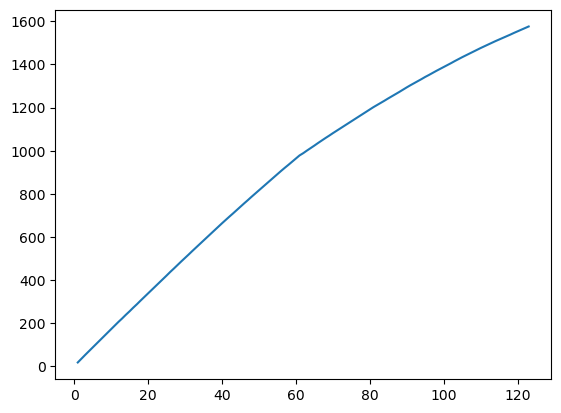

In [15]:
plt.plot(df["Time"], df["Volume"])  

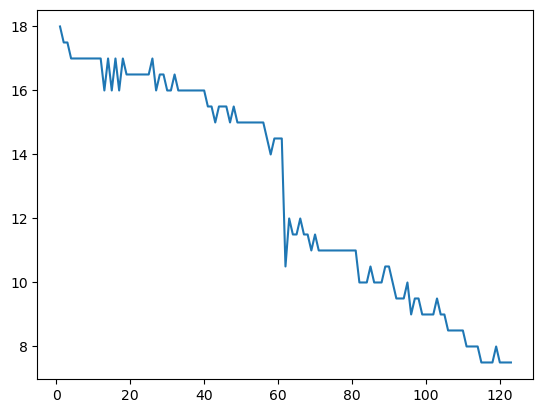

In [45]:
plt.plot(df["Time"], df["Volumetric Flow Rate"])

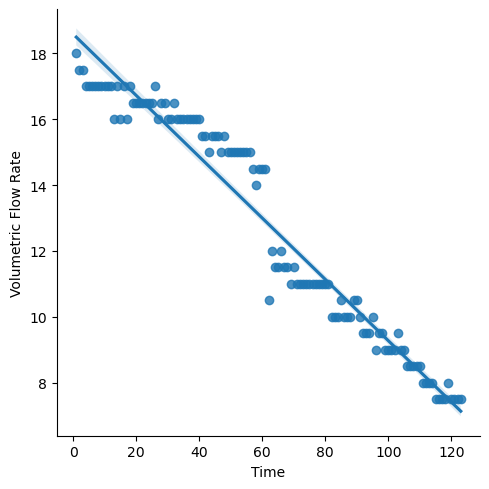

In [46]:
sns.lmplot(x="Time", y="Volumetric Flow Rate", data=df, palette='bright')

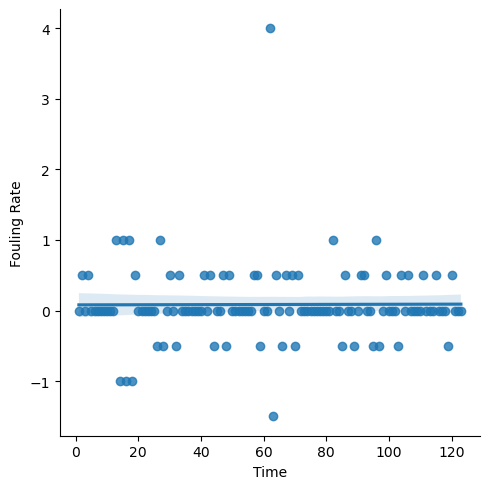

In [18]:
sns.lmplot(x="Time", y="Fouling Rate", data=df, palette='bright')

<Axes: >

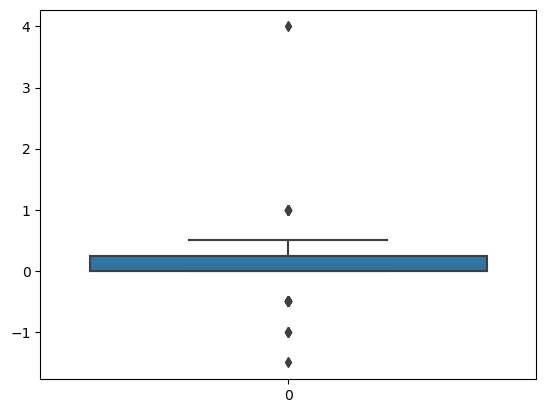

In [19]:
sns.boxplot(data=df["Fouling Rate"])        # To check outlier

Fouling Rate seems to be a small positive value, With a few errors.

In [20]:
X=df['Time']

In [21]:
y=df['Volumetric Flow Rate']

In [22]:
# Split the data set for training and testing

In [23]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = map(pd.DataFrame, train_test_split(X, y, test_size=0.5, random_state=42))

In [24]:
X_train.head()

,Time
27,28
19,20
98,99
107,108
8,9


In [25]:
y_train.head()

,Volumetric Flow Rate
27,16.5
19,16.5
98,9.0
107,8.5
8,17.0


In [26]:
X_test.head()

,Time
18,19
45,46
47,48
89,90
4,5


In [27]:
y_test.head()

,Volumetric Flow Rate
18,16.5
45,15.5
47,15.5
89,10.5
4,17.0


In [28]:
reg=linear_model.LinearRegression()

In [29]:

# Assuming df is your DataFrame with columns 'X_train' and 'y_train'

# Use single square brackets if 'X_train' is a single column
reg.fit(X_train, y_train)
#reg.fit(df[['Time']], df['Volume']);


LinearRegression()

In [30]:
# Accuracy of test data
y_pred_train = pd.DataFrame(reg.predict(X_train), columns=['Volumetric Flow Rate'])

#y_pred_test = reg.predict(X_test)

y_pred_test=pd.DataFrame(reg.predict(X_test), columns=['Volumetric Flow Rate'])

In [31]:
y_train.head()

,Volumetric Flow Rate
27,16.5
19,16.5
98,9.0
107,8.5
8,17.0


In [32]:
y_pred_train.head()

,Volumetric Flow Rate
0,15.969592
1,16.714584
2,9.357788
3,8.519672
4,17.738948


In [33]:
y_test.head()

,Volumetric Flow Rate
18,16.5
45,15.5
47,15.5
89,10.5
4,17.0


In [34]:

y_pred_test.head()

,Volumetric Flow Rate
0,16.807708
1,14.293360
2,14.107112
3,10.195904
4,18.111444


In [35]:
#R-Square of train data

test_data_accuracy=reg.score(X_train,y_train)
print('accuracy score of test data: ',test_data_accuracy )

accuracy score of test data:  0.948109166256254


In [36]:
#R-Square of test data

test_data_accuracy=reg.score(X_test,y_test)
print('accuracy score of test data: ',test_data_accuracy )

accuracy score of test data:  0.9477421433927766


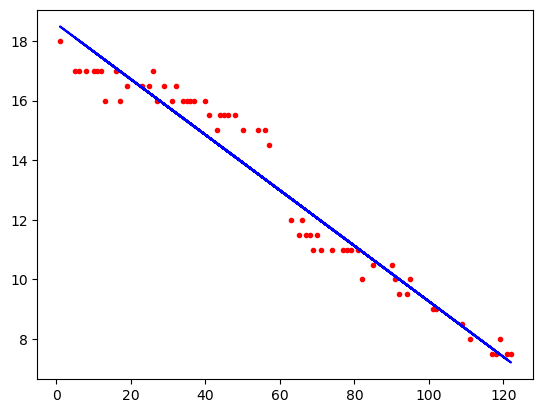

In [37]:
plt.figure(1)
plt.plot(X_test, y_test, '.r')
plt.plot(X_test, y_pred_test, '-b')    # this give the fit line

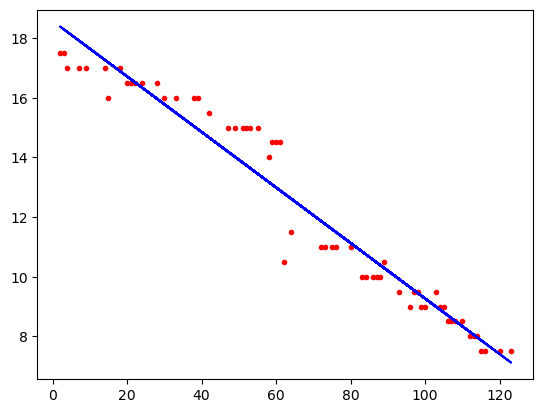

In [38]:
plt.figure(2)
plt.plot(X_train, y_train, '.r')
plt.plot(X_train, y_pred_train, '-b')    # this give the fit line

In [39]:
# for slope

reg.coef_

array([[-0.093124]])

In [40]:
# for intercept

reg.intercept_

array([18.57706427])

In [41]:
# Fouling Rate = -d2V/dt2 = - slope of dV/dt vs t
print("Fouling Rate = {x:.4f} mL/min^2".format(x = -float(reg.coef_[0][0])))

Fouling Rate = 0.0931 mL/min^2
